# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [53]:
# 필요 라이브러리부터 설치할께요.
# !pip install pandas seaborn sklearn

---

---

# 1. 라이브러리 Import 및 데이터 불러오기

* sklearn 을 설치 하세요. 

* 관련 라이브러리들을 불러오세요

In [54]:
import pandas as pd

# 학습/평가 데이터 로딩
df_21_feature_x_train = pd.read_csv("df_21_feature_x_train.csv")
df_21_target_y_train = pd.read_csv("df_21_target_y_train.csv")
df_21_feature_x_val = pd.read_csv("df_21_feature_x_val.csv")
df_21_target_y_val = pd.read_csv("df_21_target_y_val.csv")
df_21_feature = pd.read_csv("df_21_feature.csv")
df_21_target = pd.read_csv("df_21_target.csv")
df_22_feature = pd.read_csv("df_22_feature.csv")
df_22_target = pd.read_csv("df_22_target.csv")

# from google.colab import drive
# drive.mount('/content/drive')

# df_21_feature_x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_21_feature_x_train.csv")
# df_21_target_y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_21_target_y_train.csv")
# df_21_feature_x_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_21_feature_x_val.csv")
# df_21_target_y_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_21_target_y_val.csv")
# df_21_feature = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_22_feature.csv")
# df_21_target = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_22_target.csv")
# df_22_feature = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_22_feature.csv")
# df_22_target = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mini-project-2/df_22_target.csv")

#### [실습문제1] 라이브러리 불러오기



In [55]:
# 아래에 실습코드를 작성하세요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import * 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold, cross_val_score, StratifiedKFold, KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
import scipy.stats as spst
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # 전체 시각화
    if y_train != None:
      plt.figure(figsize = (20,12))
      plt.subplot(2,1,1)
      plt.plot(y_train, label = 'train')
      plt.plot(y_val, label = 'val')
      plt.plot(pred, label = 'pred')
      plt.legend()
      plt.grid()

      plt.subplot(2,1,2)
      plt.plot(y_val, label = 'val')
      plt.plot(pred, label = 'pred')
      plt.legend()
      plt.grid()
      plt.show()
    else:
      plt.figure(figsize = (20,12))
      plt.plot(y_val, label = 'val')
      plt.plot(pred, label = 'pred')
      plt.legend()
      plt.grid()
      plt.show()

In [57]:
def residual_diag(residuals, lags = 30) :
    print('* 정규성 검정(> 0.05) : ', round(spst.shapiro(residuals)[1],8))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],8))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

---

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [58]:
# 아래에 실습코드를 작성하세요.

model = LinearRegression()
model.fit(df_21_feature_x_train, df_21_target_y_train)


LinearRegression()

In [59]:
# Test 데이터로 성능을 평가해보세요.

pred = model.predict(df_21_feature_x_val)
print('RMSE : ', mean_squared_error(df_21_target_y_val, pred, squared = False))
print('MAE  : ', mean_absolute_error(df_21_target_y_val, pred))
print('MAPE : ', mean_absolute_percentage_error(df_21_target_y_val, pred))
print('r2socre : ', r2_score(df_21_target_y_val,pred))

RMSE :  5.4327432653306404
MAE  :  3.8169261154718126
MAPE :  0.09700208255475849
r2socre :  0.9543238072704829


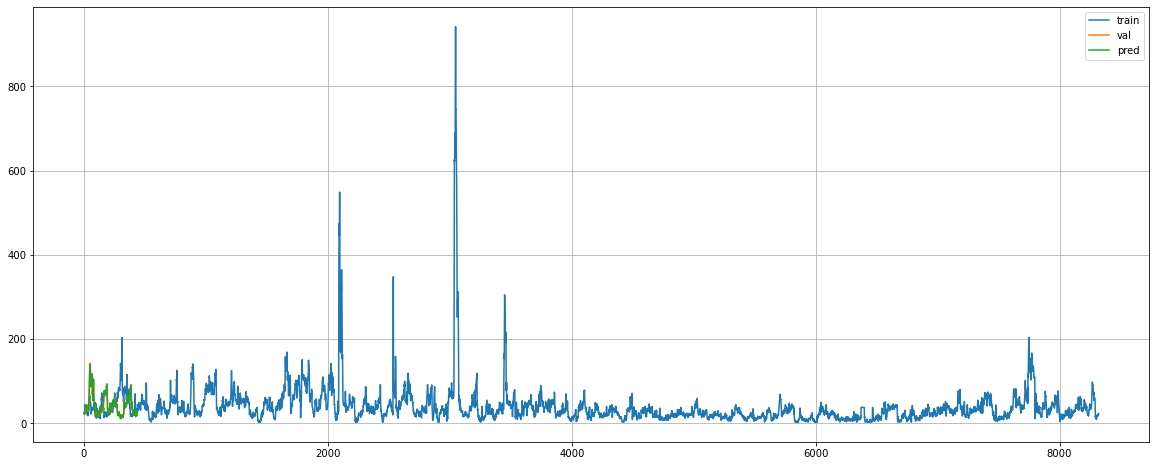

In [60]:
p1 = pd.Series(pred.squeeze(), index=df_21_target_y_val.index)
plt.figure(figsize = (20,8))
plt.plot(df_21_target_y_train, label = 'train')
plt.plot(df_21_target_y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

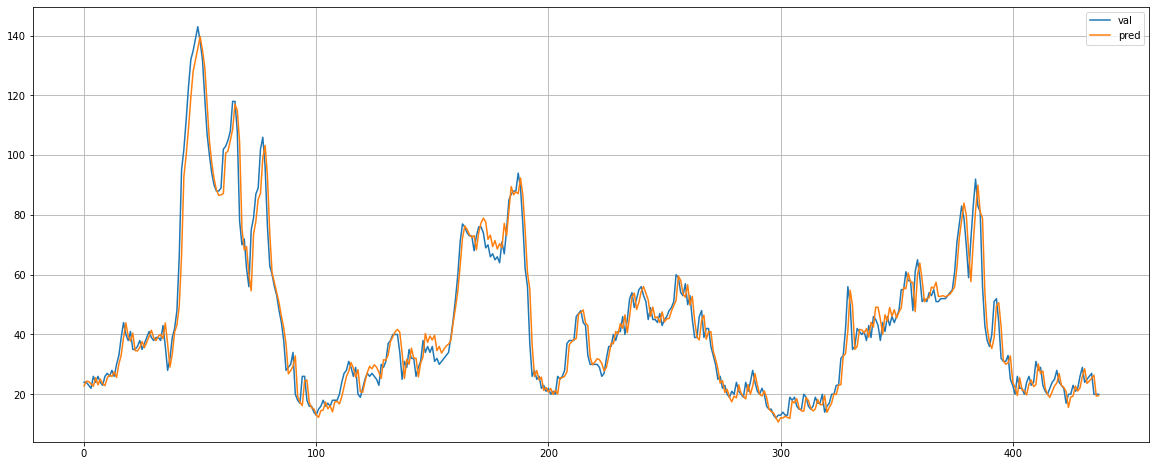

In [61]:
plt.figure(figsize = (20,8))
plt.plot(df_21_target_y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

In [62]:
model2 = LinearRegression()
model2.fit(df_21_feature, df_21_target)

LinearRegression()

In [63]:
pred = model2.predict(df_22_feature)
print('RMSE : ', mean_squared_error(df_22_target, pred, squared = False))
print('MAE  : ', mean_absolute_error(df_22_target, pred))
print('MAPE : ', mean_absolute_percentage_error(df_22_target, pred))
print('r2socre : ', r2_score(df_22_target,pred))

RMSE :  6.639797173475291
MAE  :  4.036720435085303
MAPE :  0.11880195035563837
r2socre :  0.9206021313677795


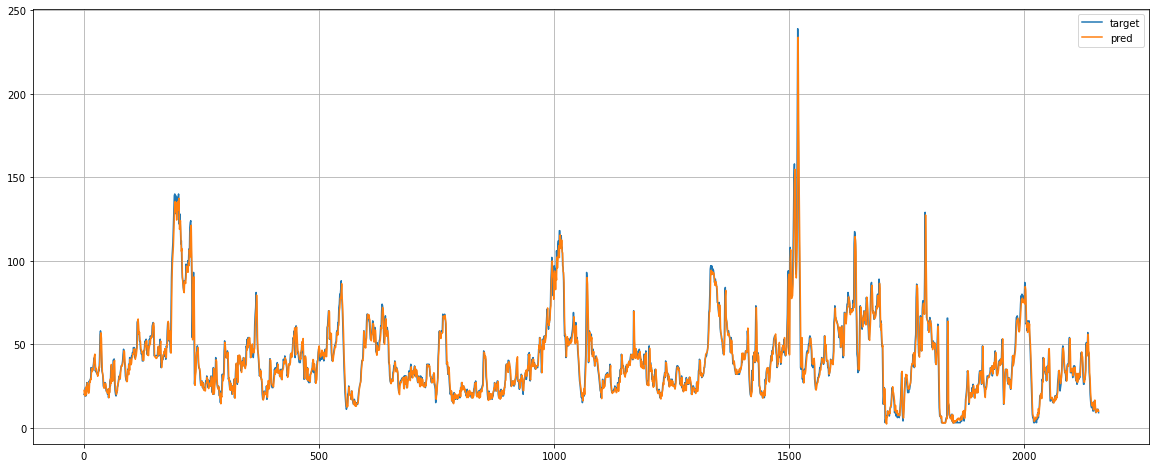

In [64]:
p1 = pd.Series(pred.squeeze(), index=df_22_target.index)
plt.figure(figsize = (20,8))
plt.plot(df_22_target, label = 'target')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

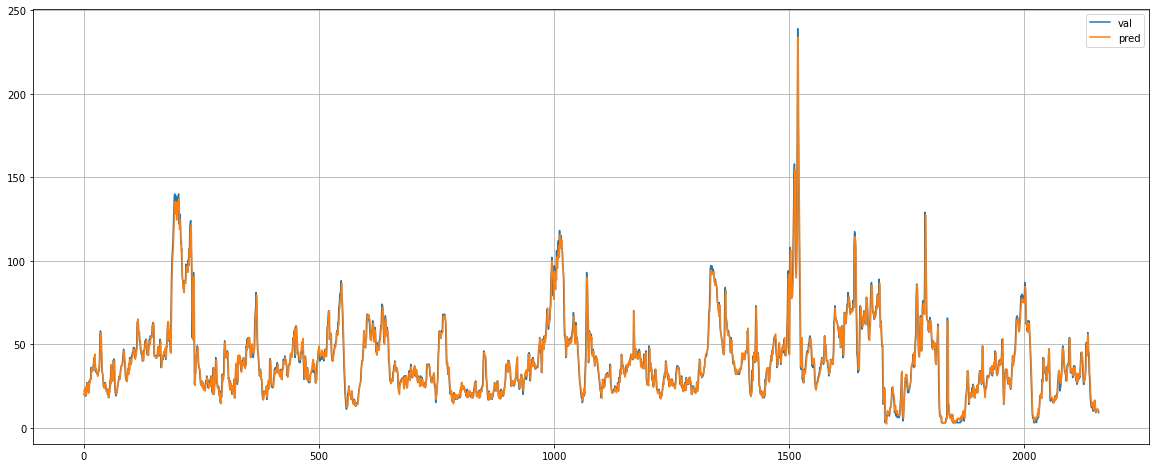

In [65]:
plt.figure(figsize = (20,8))
plt.plot(df_22_target, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

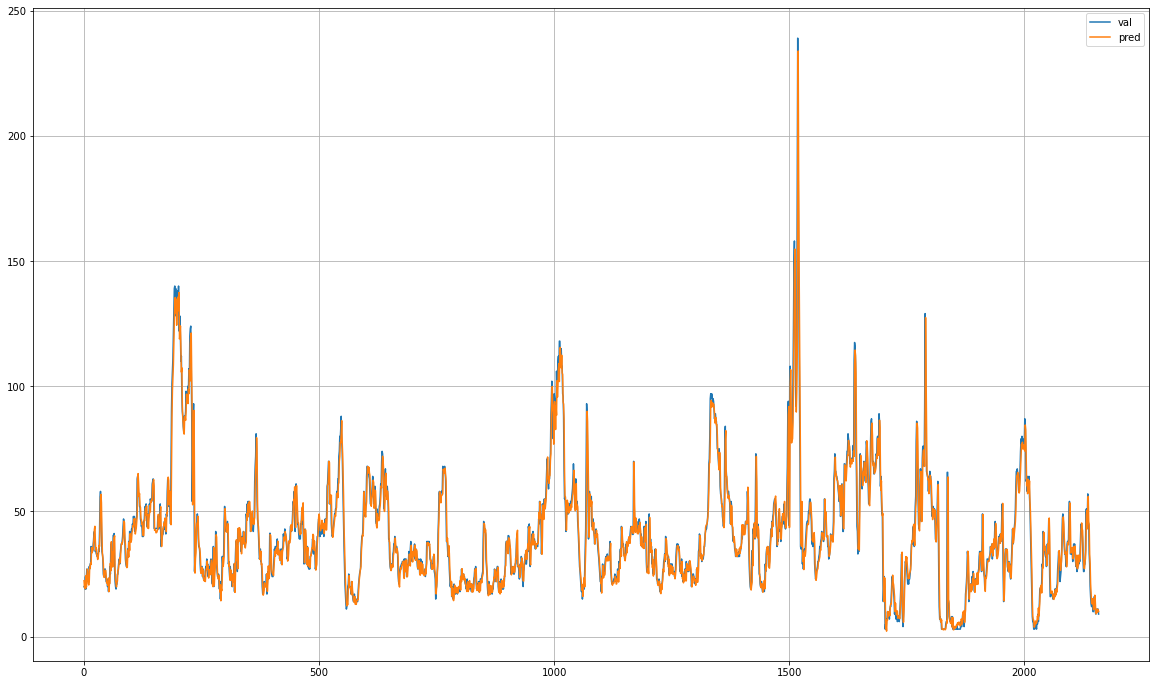

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


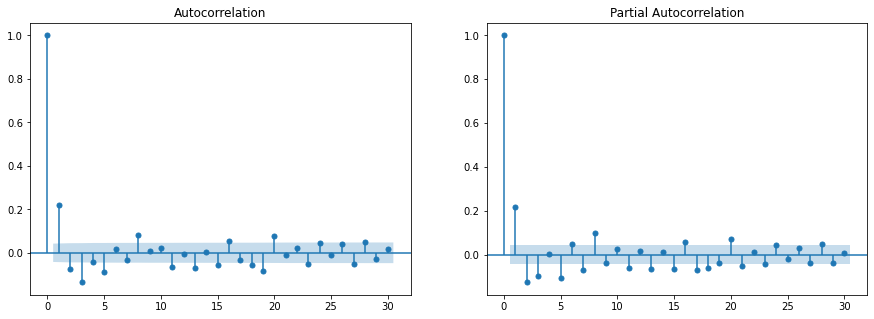

In [66]:
residuals = df_22_target - pred
plot_model_result(None, df_22_target, pred.squeeze())
residual_diag(residuals, lags = 30)

In [67]:
# 학습한 모델을 파일로 저장해보세요.

import joblib 

joblib.dump(model, 'model_Linear_train.pkl')
joblib.dump(model2, 'model_Linear_total.pkl')

# joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/mini-project-2/model_Linear_train.pkl')
# joblib.dump(model2, '/content/drive/MyDrive/Colab Notebooks/mini-project-2/model_Linear_total.pkl')

['model_Linear_total.pkl']

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언브스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [68]:
# 아래에 실습코드를 작성하세요.

params = {'n_estimators' : range(10,51,10), 'max_depth' : range(3,11), 'min_samples_leaf' : range(50,301,50)}
model = RandomForestRegressor()
model_gs = GridSearchCV(model, params, cv=5, verbose=3)
model_gs.fit(df_21_feature_x_train, df_21_target_y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.5s
[CV 4/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.4s
[CV 5/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.4s
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.8s
[CV 2/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.9s
[CV 5/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=30; total time=   1.1s
[CV 2/5] END max_depth=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(3, 11),
                         'min_samples_leaf': range(50, 301, 50),
                         'n_estimators': range(10, 51, 10)},
             verbose=3)

In [69]:
# Test 데이터로 성능을 평가해보세요.

pred = model_gs.predict(df_21_feature_x_val)

print('best_estimator : ', model_gs.best_estimator_)
print('RMSE : ', mean_squared_error(df_21_target_y_val, pred, squared = False))
print('MAE  : ', mean_absolute_error(df_21_target_y_val, pred))
print('MAPE : ', mean_absolute_percentage_error(df_21_target_y_val, pred))
print('r2socre : ', r2_score(df_21_target_y_val,pred))



best_estimator :  RandomForestRegressor(max_depth=9, min_samples_leaf=50, n_estimators=40)
RMSE :  5.730969015004426
MAE  :  3.8763251581934783
MAPE :  0.09658742572535517
r2socre :  0.949171457869635


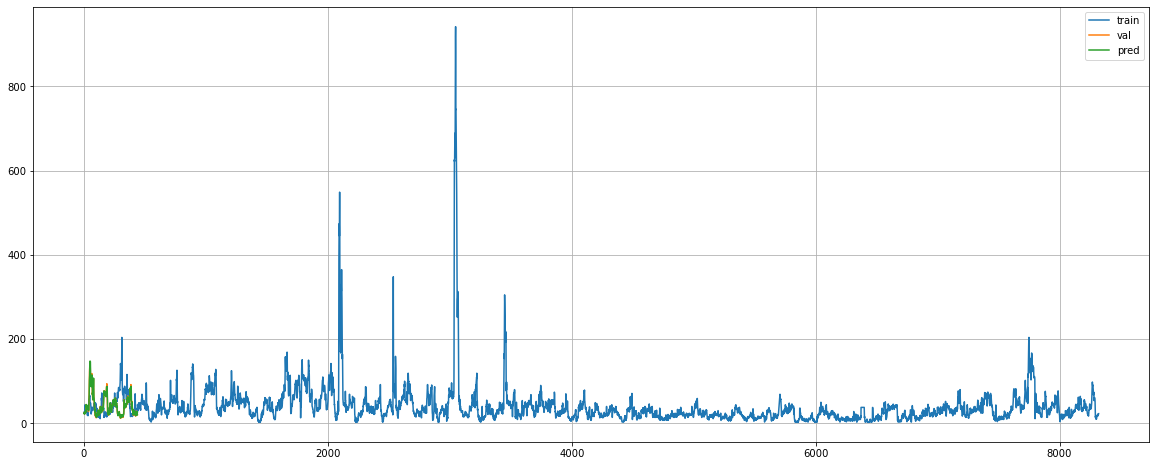

In [70]:
p1 = pd.Series(pred.squeeze(), index=df_21_target_y_val.index)
plt.figure(figsize = (20,8))
plt.plot(df_21_target_y_train, label = 'train')
plt.plot(df_21_target_y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()



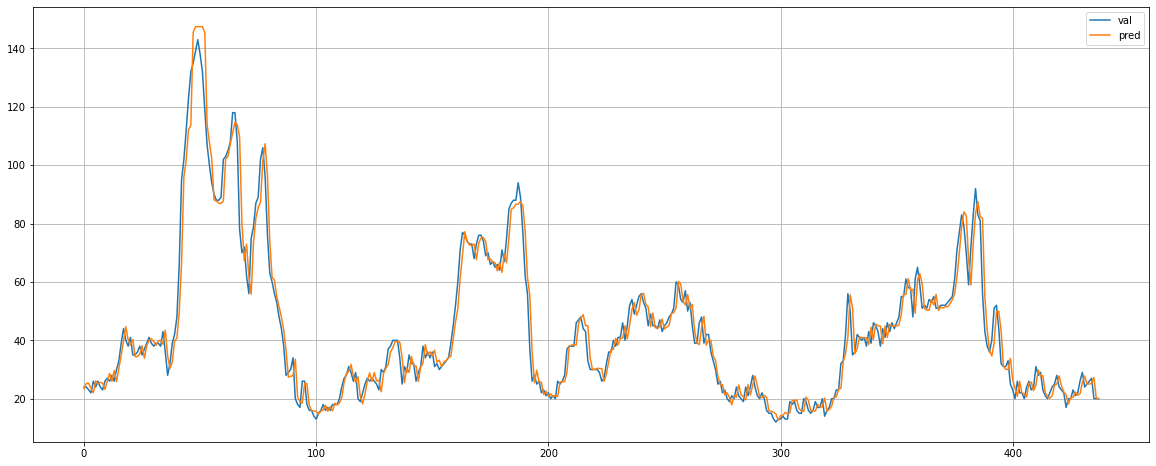

In [71]:
plt.figure(figsize = (20,8))
plt.plot(df_21_target_y_val, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

In [72]:
# 아래에 실습코드를 작성하세요.

params = {'n_estimators' : range(10,51,10), 'max_depth' : range(3,11), 'min_samples_leaf' : range(50,301,50)}
model = RandomForestRegressor()
model_gs2 = GridSearchCV(model, params, cv=5, verbose=3)
model_gs2.fit(df_21_feature, df_21_target)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=50, n_estimators=10; total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.5s
[CV 4/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.5s
[CV 5/5] END max_depth=3, min_samples_leaf=50, n_estimators=20; total time=   0.5s
[CV 1/5] END max_depth=3, min_samples_leaf=50, n_estimators=30; total time=   0.7s
[CV 2/5] END max_depth=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(3, 11),
                         'min_samples_leaf': range(50, 301, 50),
                         'n_estimators': range(10, 51, 10)},
             verbose=3)

In [73]:
# Test 데이터로 성능을 평가해보세요.

pred = model_gs2.predict(df_22_feature)

print('best_estimator : ', model_gs2.best_estimator_)
print('RMSE : ', mean_squared_error(df_22_target, pred, squared = False))
print('MAE  : ', mean_absolute_error(df_22_target, pred))
print('MAPE : ', mean_absolute_percentage_error(df_22_target, pred))
print('r2socre : ', r2_score(df_22_target,pred))



best_estimator :  RandomForestRegressor(max_depth=7, min_samples_leaf=50, n_estimators=20)
RMSE :  8.08814251235787
MAE  :  4.182539237597773
MAPE :  0.12304836905004246
r2socre :  0.8821860253692763


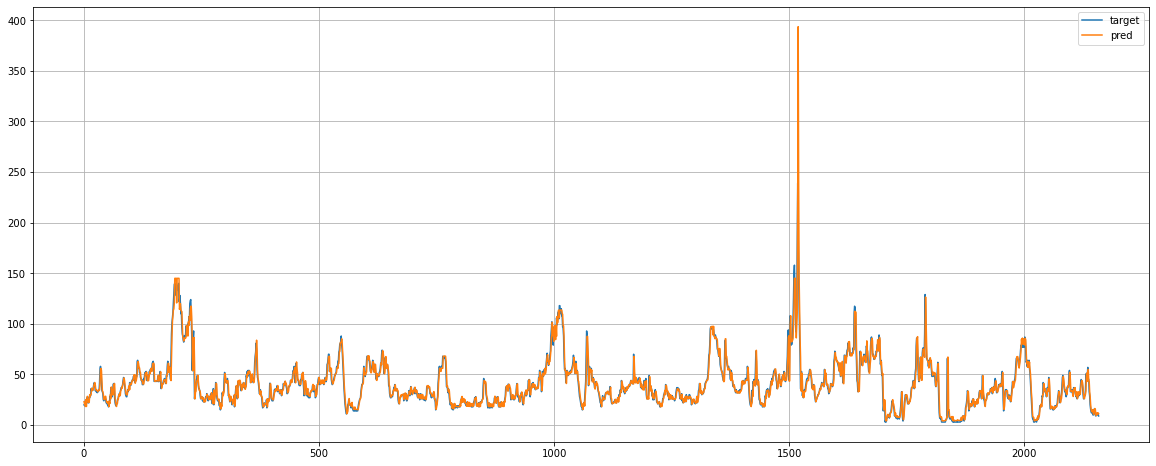

In [74]:
p1 = pd.Series(pred.squeeze(), index=df_22_target.index)
plt.figure(figsize = (20,8))
plt.plot(df_22_target, label = 'target')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

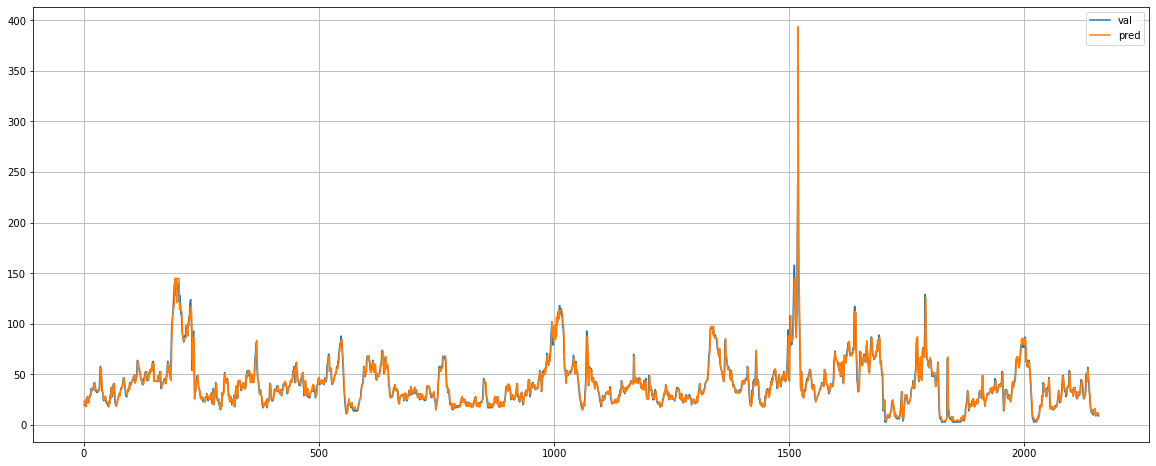

In [75]:
plt.figure(figsize = (20,8))
plt.plot(df_22_target, label = 'val')
plt.plot(p1, label = 'pred')

plt.legend()
plt.grid()
plt.show()

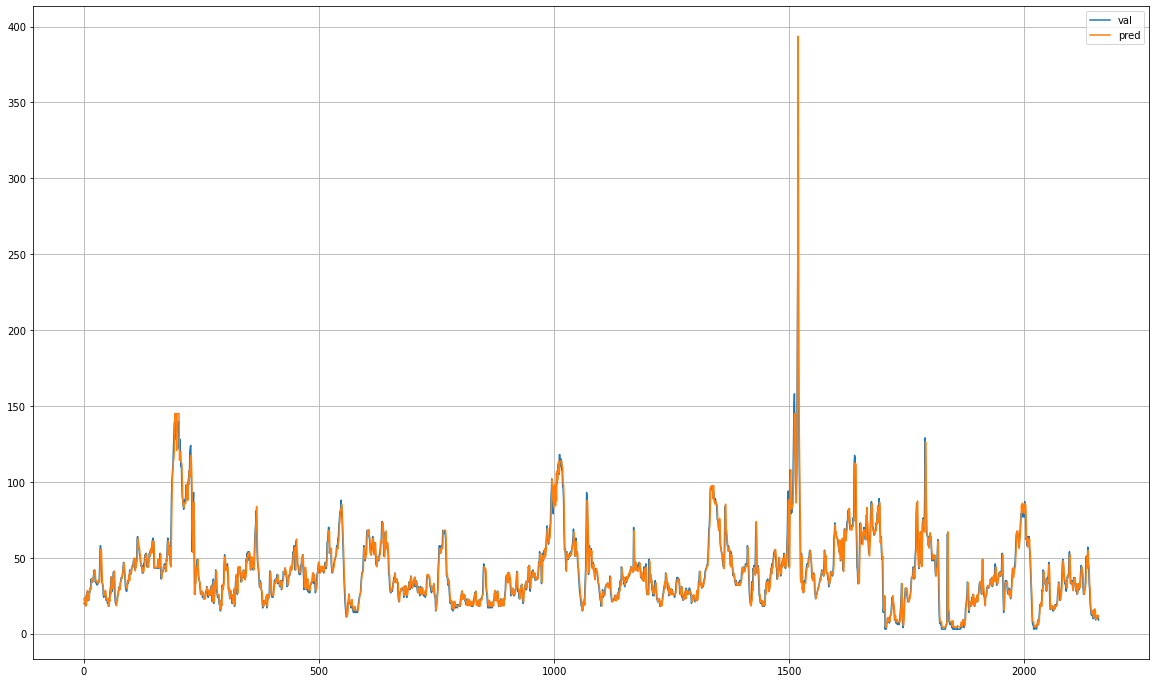

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


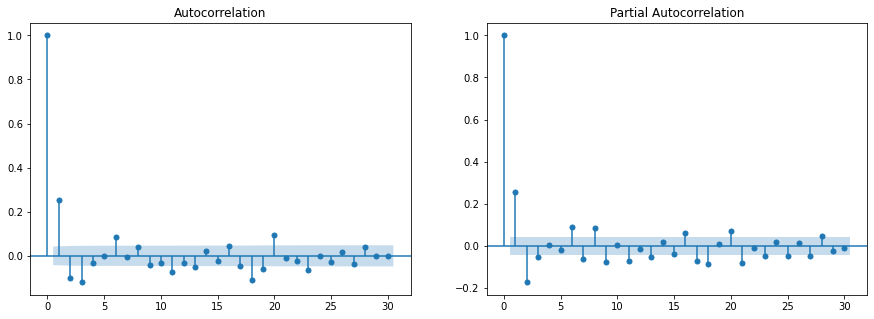

In [76]:
residuals = df_22_target.squeeze() - pred
plot_model_result(None, df_22_target, pred)
residual_diag(residuals, lags = 30)

In [77]:
# 학습한 모델을 파일로 저장해보세요.

joblib.dump(model_gs, 'model_rfg_train.pkl')
joblib.dump(model_gs2, 'model_rfg_total.pkl')


# import joblib 
# joblib.dump(model_gs, '/content/drive/MyDrive/Colab Notebooks/mini-project-2/model_rfg_train.pkl')
# joblib.dump(model_gs2, '/content/drive/MyDrive/Colab Notebooks/mini-project-2/model_rfg_total.pkl')

['model_rfg_total.pkl']

In [101]:
temp_df = pd.DataFrame({'pred' : [], 'val' : []})

temp_df['pred'] = pred
temp_df['val'] = df_22_target

temp_df[1516:].head(7)


,pred,val
1516,100.074391,115.0
1517,111.222427,182.0
1518,228.645245,239.0
1519,393.665593,188.0
1520,239.834262,150.0
1521,145.010953,121.0
1522,112.288666,90.0


#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

,feature_names,feature_importance
0,PM10,9.990069e-01
1,CO,1.175429e-04
2,NO2,9.388386e-05
3,습도(%),8.899599e-05
4,적설(cm),6.343383e-05
5,시정(10m),6.340788e-05
6,강수량(mm),6.299946e-05
7,PM25,5.267065e-05
8,일사(MJ/m2),5.187139e-05
9,최저운고(100m ),4.803999e-05


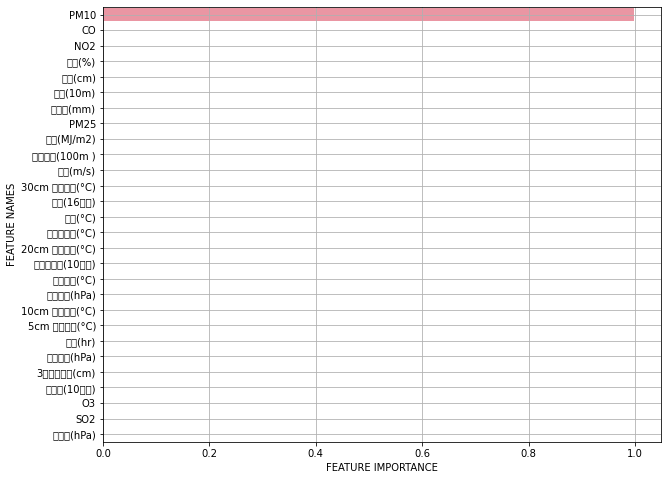

In [103]:
# Feature의 중요도 확인
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

plot_feature_importance(model_gs2.best_estimator_.feature_importances_, list(df_22_feature))



In [79]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [80]:
# 아래에 실습코드를 작성하세요.





In [81]:
# Test 데이터로 성능을 평가해보세요.





In [82]:
# 학습한 모델을 파일로 저장해보세요.





#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [83]:
# Feature의 중요도 확인





In [84]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제7] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [85]:
# 아래에 실습코드를 작성하세요.





In [86]:
# Test 데이터로 성능을 평가해보세요.





In [87]:
# 학습한 모델을 파일로 저장해보세요.





#### [실습문제8] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [88]:
# Feature의 중요도 확인





In [89]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.